<a href="https://colab.research.google.com/github/sys7498/2022F-Ajou-ML/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1 :: Data preprocessing & KNN

## 코랩과 구글 드라이브 연동하기

In [342]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [343]:
# pwd 명령어로 현재 위치 확인
!pwd

/content/drive/My Drive/Colab Notebooks


In [344]:
!ls

 airline_sampled.csv   HW1  'HW1.ipynb의 사본'


In [345]:
# 이 노트북 파일이 저장되어 있는 디렉토리 위치까지 옮기기
#cd drive/MyDrive/Colab Notebooks

In [346]:
cd drive/MyDrive/Colab Notebooks

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks


---

## 데이터 불러오기 & 살펴보기

In [347]:
# 이번 과제는 numpy, pandas와 같은 데이터를 불러내고 확인, 처리, 
# 수정 등을 쉽게 할 수 있는 library를 사용합니다.

# 모듈 이름 뒤에 as를 쓰고 별칭을 적으면 해당 별칭으로 모듈을 호출할 수 있습니다.
# 모듈명: numpy, 별칭: np => numpy를 쓰는 대신 np를 써서 numpy 호출
# 모듈명: pandas, 별칭: pd => pandas를 쓰는 대신 pd를 써서 pandas 호출
import numpy as np
import pandas as pd

In [348]:
# './'는 이 노트북 파일의 현재 위치를 뜻 합니다.
# 노트북 파일과 같은 위치에 데이터 파일을 두어야 아래와 같이 데이터 파일을 불러올 수 있습니다.
# kaggle 원본 데이터 파일과 다릅니다. 반드시 제공된 데이터를 사용하세요!
path = './airline_sampled.csv' 

# pandas의 read_csv 함수를 사용하여 csv파일을 DataFrame으로 불러옵니다.
data = pd.read_csv(path)

In [349]:
# DataFrame 혹은 Series와 같은 자료구조에 shape함수를 통해 데이터의 크기와 
# 변수의 갯수를 대략적으로 알 수 있습니다.

data.shape # (10000, 23) => 10000 개의 row(행), 23 개의 column(열)을 가진 데이터

(10000, 23)

In [350]:
# head() 함수를 이용하여 해당 데이터의 맨 위 5개의 원소를 볼 수 있습니다.
# 더 많은 행을 보고 싶다면 ()안에 숫자를 넣어주시면 됩니다.

data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,41,Personal Travel,Eco,569,2,5,2,4,...,2,1,5,3,3,1,2,0,0.0,neutral or dissatisfied
1,Female,Loyal Customer,45,Personal Travel,Business,1085,3,5,2,3,...,4,4,2,4,4,4,3,23,0.0,neutral or dissatisfied
2,Female,Loyal Customer,23,Personal Travel,Eco,468,3,2,3,2,...,5,1,4,2,1,3,5,4,0.0,neutral or dissatisfied
3,Female,Loyal Customer,34,Personal Travel,Eco Plus,303,4,5,4,2,...,3,5,5,5,3,5,3,49,50.0,neutral or dissatisfied
4,Male,Loyal Customer,21,Personal Travel,Eco,1190,4,4,4,4,...,1,5,3,3,3,4,1,8,0.0,satisfied


In [351]:
# tail() 함수를 이용하여 해당 데이터의 맨 뒤 5개의 원소를 볼 수 있습니다.
# 더 많은 행을 보고 싶다면 ()안에 숫자를 넣어주시면 됩니다.

data.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
9995,Male,Loyal Customer,53,Business travel,Eco,834,1,4,4,4,...,1,1,1,3,4,4,1,28,8.0,neutral or dissatisfied
9996,Male,Loyal Customer,42,Business travel,Eco,134,2,2,2,2,...,2,3,4,3,2,1,2,143,159.0,neutral or dissatisfied
9997,Male,Loyal Customer,64,Personal Travel,Eco Plus,425,2,2,2,2,...,2,3,2,2,1,3,2,9,84.0,neutral or dissatisfied
9998,Male,Loyal Customer,46,Business travel,Business,2374,3,3,3,3,...,3,3,4,3,5,3,5,0,0.0,satisfied
9999,Male,Loyal Customer,59,Business travel,Business,2637,4,4,4,4,...,3,3,4,3,4,3,4,16,1.0,satisfied


In [352]:
# DataFrame을 이루고 있는 column의 이름을 확인합니다.

data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [353]:
# DataFrame을 이루고 있는 column 별 데이터의 타입을 확인합니다.

data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [354]:
# describe()는 각 column에 대해 통계량을 요약해주는 함수입니다.
# 기본적으로 NaN(누락데이터)는 제외하고 데이터 요약이 수행됩니다.

data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9965.000000
mean,39.528600,1199.730400,2.747700,3.062200,2.767800,2.984700,3.213200,3.266700,3.440600,3.360000,3.380600,3.363200,3.634600,3.296500,3.633600,3.286000,14.610200,15.148319
std,15.091122,1014.036332,1.320234,1.511277,1.398027,1.278683,1.316176,1.342293,1.308833,1.332208,1.293024,1.318507,1.190388,1.259661,1.185028,1.297294,36.684733,37.203171
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,27.000000,407.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1749.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,14.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,748.000000,720.000000


## 문제 1 :: 변수의 타입

:[링크 텍스트](https://)* 보고서에 설명된 것을 바탕을 주어진 데이터의 변수들의 타입을 보고서에 기술하세요.

  * 작성 형식) : 1. 변수 이름: categorical
  * 작성 예시) 1. Age: Numeric

정답)
* Gender: categorical
* Customer type: categorical
* Age: numeric
* Type of travel: categorical
* Class: categorical
* Flight Distance: numeric
* Inflight wifi service: numeric
* Departure/Arrival time convenient: numeric
* Ease of Online booking: numeric
* Gate location: numeric
* Food and drink: numeric
* Online boarding: numeric
* Seat comfort: numeric 
* Inflight entertainment: numeric
* On-board service: numeric
* Leg room service: numeric
* Baggage handling: numeric
* Checkin service: numeric
* Inflight service: numeric
* Cleanliness: numeric
* Departure Delay in Minutes: numeric
* Arrival Delay in Minutes: numeric
* satisfaction: categorical


## 결측값과 중복값 확인하기
결측값과 중복값은 데이터 분석 결과에 큰 영향을 줍니다.   
제공된 데이터에 결측값과 중복값이 있는지 알아봅시다.

In [355]:
# isnull()는 DataFrame에 있는 결측치(NA)를 boolean 값으로 반환하는 함수입니다.
# 결측치가 있으면 True를 반환합니다.

data.isnull().head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [356]:
# isnull()에 sum() 를 결합하여 DataFrame에 있는 결측치의 합을 구합니다.

data.isnull().sum() # 문제3에서 KNN Imputer를 사용하여 결측값을 보정할 예정

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             35
satisfaction                          0
dtype: int64

In [357]:
# duplicated()는 중복된 데이터를 Series 형식으로 반환합니다.

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [358]:
# duplicated()에 sum()을 결합하여 DataFrame에 있는 중복 데이터의 합을 구합니다.

data.duplicated().sum()

0

## 문제 2 :: 데이터 정리


### 문제 2-1
제공된 데이터에서 categorical 변수들을 주어진 조건에 따라 인코딩하고 작성한 코드를 캡처 후 보고서에 업로드 하세요.

* data에서 satisfaction 열의 데이터 값을 `neutral or dissatisfied` 일 경우 0, `satisfied`일 경우 1로 인코딩하세요.

* data에서 Gender 열의 데이터 값을 `Male`일 경우 0, `Female`일 경우 1로 인코딩하세요.

* data에서 Customer Type 열의 데이터 값을 `disloyal Customer`일 경우 0, `Loyal Customer`일 경우 1로 인코딩하세요.

* data에서 Class 열의 데이터 값을 `Eco`일 경우 0, `Eco Plus`일 경우 1, `Business`일 경우 2로 인코딩하세요.

* data에서 'Type of Travel 열의 데이터 값을 `Personal Travel`일 경우 0, `Business travel`일 경우 1로 인코딩하세요.

In [359]:
data['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [360]:
data['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [361]:
data['satisfaction'].unique() # satisfaction 열은 두 가지의 클래스로 구성되어 있다는 것을 확인합니다.

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [362]:
data['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [363]:
################  문제 2-1  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

data = data.replace({'Type of Travel':'Personal Travel'}, 0)           # replace 함수 사용하여 인덱싱
data = data.replace({'Type of Travel':'Business travel'}, 1)           # replace 함수 사용하여 인덱싱                  
data = data.replace({'Customer Type':'disloyal Customer'}, 0)          # replace 함수 사용하여 인덱싱                   
data = data.replace({'Customer Type':'Loyal Customer'}, 1)             # replace 함수 사용하여 인덱싱                
data = data.replace({'Gender':'Male'}, 0)                              # replace 함수 사용하여 인덱싱
data = data.replace({'Gender':'Female'}, 1)                            # replace 함수 사용하여 인덱싱 
data = data.replace({'Class':'Eco'}, 0)                                # replace 함수 사용하여 인덱싱
data = data.replace({'Class':'Eco Plus'}, 1)                           # replace 함수 사용하여 인덱싱  
data = data.replace({'Class':'Business'}, 2)                           # replace 함수 사용하여 인덱싱  
data = data.replace({'satisfaction':'neutral or dissatisfied'}, 0)     # replace 함수 사용하여 인덱싱                        
data = data.replace({'satisfaction':'satisfied'}, 1)                   # replace 함수 사용하여 인덱싱

################ 코드 끝 ########################
##################################################

In [364]:
# 인코딩한 데이터 열의 데이터 속성을 변환하는 코드
data['satisfaction'] = data['satisfaction'].astype('int')
data['Gender'] = data['Gender'].astype('int')
data['Customer Type'] = data['Customer Type'].astype('int')
data['Class'] = data['Class'].astype('int')
data['Type of Travel'] = data['Type of Travel'].astype('int')

### 문제 2-2
`Arrival Delay in Minutes` 열은 현재 분 단위로 데이터가 구성되어 있습니다.  
시간 단위로 데이터를 나타내는 `delay_in_hours`을 작성하고 캡처하여 보고서에 업로드 하세요.


예) 18분 => 18/60=0.3

In [365]:
################  문제 2-2  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

def delay_in_hours(minute): 
  return minute/60 # minute을 60으로 나눈 값 리턴턴

################ 코드 끝 ########################
#################################################

In [366]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].apply(lambda row: delay_in_hours(row))

In [367]:
data # Arrival Delay in Minutes 열이 바뀌었는지 확인

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,41,0,0,569,2,5,2,4,...,2,1,5,3,3,1,2,0,0.000000,0
1,1,1,45,0,2,1085,3,5,2,3,...,4,4,2,4,4,4,3,23,0.000000,0
2,1,1,23,0,0,468,3,2,3,2,...,5,1,4,2,1,3,5,4,0.000000,0
3,1,1,34,0,1,303,4,5,4,2,...,3,5,5,5,3,5,3,49,0.833333,0
4,0,1,21,0,0,1190,4,4,4,4,...,1,5,3,3,3,4,1,8,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,53,1,0,834,1,4,4,4,...,1,1,1,3,4,4,1,28,0.133333,0
9996,0,1,42,1,0,134,2,2,2,2,...,2,3,4,3,2,1,2,143,2.650000,0
9997,0,1,64,0,1,425,2,2,2,2,...,2,3,2,2,1,3,2,9,1.400000,0
9998,0,1,46,1,2,2374,3,3,3,3,...,3,3,4,3,5,3,5,0,0.000000,1


In [368]:
data['Departure Delay in Minutes'] = data['Departure Delay in Minutes'].apply(lambda row: delay_in_hours(row))

### 문제 2-3
`Departure Delay in Minutes`와 `Arrival Delay in Minutes` 열의 이름을 각각 `Departure Delay in Hours`와 `Arrival Delay in Hours`로 변경하세요.

**코드를 보고서에 캡처하여 업로드하세요.**

In [369]:
################  문제 2-3  #################
# 열 이름 변경하기
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  ##################

data = data.rename(columns={'Departure Delay in Minutes':'Departure Delay in Hours'}) # rename 함수를 이용하여 이름변경
data = data.rename(columns={'Arrival Delay in Minutes':'Arrival Delay in Hours'}) # rename 함수를 이용하여  이름변경

################ 코드 끝  ####################
##############################################

## 문제 3 :: KNN Imputer

### **`Arrival Delay in Hours`** 열과 연관성이 높은 열 찾기


결측값이 있는 모든 행과 결측값이 없는 데이터 사이의 거리를 구할 수 있지만, 계산 시간이 매우 오려 걸려 `Arrival Delay in Hours` 열과 가장 연관성이 높은 `Departure Delay in Hours` 과의 거리를 기준으로 결측값을 보정합니다.

In [370]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Hours,Arrival Delay in Hours,satisfaction
Gender,1.000000,-0.039335,-0.008827,0.000993,-0.004896,-0.010568,-0.009792,-0.013523,-0.007462,-0.001833,-0.000437,0.039623,0.025450,-0.011615,-0.013676,-0.025414,-0.026946,-0.011055,-0.043432,0.002685,-0.001729,-0.000743,-0.021130
Customer Type,-0.039335,1.000000,0.279760,-0.301125,0.099573,0.232986,0.003067,0.190510,0.012744,-0.001235,0.053701,0.187365,0.156911,0.100546,0.051342,0.049211,-0.029366,0.036146,-0.016833,0.079462,0.000784,0.001549,0.180171
Age,-0.008827,0.279760,1.000000,0.053130,0.145780,0.105082,0.014329,0.022185,0.016764,0.000979,0.034687,0.215936,0.176012,0.080572,0.048496,0.039346,-0.064682,0.044622,-0.055130,0.065470,-0.004636,-0.009000,0.139109
Type of Travel,0.000993,-0.301125,0.053130,1.000000,0.546956,0.274736,0.107736,-0.251650,0.128235,0.015835,0.065778,0.224131,0.124524,0.166236,0.082920,0.144327,0.042218,-0.018671,0.026330,0.082485,0.011967,0.008376,0.457784
Class,-0.004896,0.099573,0.145780,0.546956,1.000000,0.462634,0.029585,-0.086372,0.101516,0.010697,0.079662,0.313044,0.219203,0.196808,0.224421,0.207752,0.164252,0.150011,0.157750,0.125192,0.003979,-0.004327,0.495794
Flight Distance,-0.010568,0.232986,0.105082,0.274736,0.462634,1.000000,0.012272,-0.022690,0.062303,-0.000884,0.061648,0.209984,0.157622,0.140803,0.136315,0.145021,0.070554,0.080945,0.067474,0.083553,0.012532,0.008903,0.317737
Inflight wifi service,-0.009792,0.003067,0.014329,0.107736,0.029585,0.012272,1.000000,0.365403,0.722020,0.338414,0.126326,0.455533,0.111103,0.212281,0.124976,0.175711,0.123524,0.028329,0.108260,0.140116,-0.012000,-0.015243,0.276985
Departure/Arrival time convenient,-0.013523,0.190510,0.022185,-0.251650,-0.086372,-0.022690,0.365403,1.000000,0.440805,0.451210,0.002785,0.081697,0.000907,0.000401,0.070897,0.017671,0.076121,0.087816,0.075383,0.016686,-0.013400,-0.013777,-0.040750
Ease of Online booking,-0.007462,0.012744,0.016764,0.128235,0.101516,0.062303,0.722020,0.440805,1.000000,0.445800,0.035658,0.407503,0.030612,0.059708,0.043306,0.125404,0.038133,-0.002472,0.039372,0.028238,-0.004405,-0.008146,0.166110
Gate location,-0.001833,-0.001235,0.000979,0.015835,0.010697,-0.000884,0.338414,0.451210,0.445800,1.000000,0.001106,0.004184,0.005821,0.016972,-0.025331,0.002822,0.010059,-0.043938,0.019004,-0.002426,0.009158,0.004700,0.012655


`Departure Delay in Hours` 와 `Arrival Delay in Hours`의 상관 계수가 0.96인 것으로 보아 두 열이 큰 상관 관계를 가짐을 알 수 있습니다.   따라서 두 열만 골라 X라는 데이터프레임을 만듭니다.

In [371]:
X = data[['Departure Delay in Hours', 'Arrival Delay in Hours']]

### 문제 3-1, 3-2
K-Nearest Neighbor Imputation(강의노트 24쪽)을 이용하여 결측치 채우기

### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.



### 문제 3-2
주어진 코드틀에 k개의 "Arrival Delay in Hours" 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [372]:
import tqdm

In [373]:
class Knn_imputer():
  def __init__(self, n_neighbors): 
        
    ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
    self.k = n_neighbors    
  
  ## knn 은 lazy learning 입니다.
  def fit(self,X):
      self.X = X
  
  def predict(self, X):

    for i in tqdm.tqdm(range(len(X))):
     if pd.isnull(X['Arrival Delay in Hours'].iloc[i]): # Arrival Delay 열에 있는 결측값 확인

        distance = self.dist(X, X.iloc[i]) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
      
        
        sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기

         ################  문제 3-2  ####################
         # k개의 "Arrival Delay in Hours" 값을 보고 평균 내어
         # 값을 결정하기
         
         # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
         # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################
        temp = 0  # k개의 Arrival Delay in Hours 값의 합을 저장할 변수 temp
        for i in range(self.k): # k번 반복복

          # X['Arrival Delay in Hours']의 sorted_dist에 저장되어있는 index값의 값을 temp에 계속해서 더해줌줌
          temp += X['Arrival Delay in Hours'].iloc[sorted_dist[i][0]] 

        temp = temp / self.k # 평균을 위해 temp를 k로 나눠줌


        X['Arrival Delay in Hours'].iloc[i] =  temp # 결측값을 temp로 저장장
          

        
        ################ 코드 끝  ######################
        ##############################################
        
  
  def dist(self, X, y):
    num_train = X.shape[0]

    X = X.drop(['Arrival Delay in Hours'], axis=1)
    y = y.drop(['Arrival Delay in Hours'])
    dist_dict = {} ## {index : distance} 형태

    for i in range(num_train):

    
    ################  문제 3-1  ####################
    # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
    # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
    # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
    ################ 코드 시작  #####################

      # departure delay in hours를 통해 거리 측정(유클리디언거리) 후 dist_dict에 key: i 값으로 저장
      dist_dict[i] = np.sqrt(np.power((X.iloc[i].iloc[0] - y.iloc[0]), 2)) 

    ################ 코드 끝  ######################
    ##############################################


    return dist_dict


In [374]:
imputer = Knn_imputer(3)
imputer.fit(X)

# test set에 대해 predict를 진행합니다.
imputer.predict(X) # 오래 걸립니다

  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 10000/10000 [00:29<00:00, 343.54it/s]


In [375]:
X.isnull().sum() # 결측값이 채워졌는지 확인

Departure Delay in Hours     0
Arrival Delay in Hours      35
dtype: int64

## 문제 4
* satisfaction 열과의 상관 계수가 0.4 이상인 열만 추출하여 dataframe 생성 `data_final`을 생성하고 보고서에 어떤 열을 선택했는지 열의 이름을 서술하세요.

* 선택한 열:

In [376]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Hours,Arrival Delay in Hours,satisfaction
Gender,1.000000,-0.039335,-0.008827,0.000993,-0.004896,-0.010568,-0.009792,-0.013523,-0.007462,-0.001833,-0.000437,0.039623,0.025450,-0.011615,-0.013676,-0.025414,-0.026946,-0.011055,-0.043432,0.002685,-0.001729,-0.000743,-0.021130
Customer Type,-0.039335,1.000000,0.279760,-0.301125,0.099573,0.232986,0.003067,0.190510,0.012744,-0.001235,0.053701,0.187365,0.156911,0.100546,0.051342,0.049211,-0.029366,0.036146,-0.016833,0.079462,0.000784,0.001549,0.180171
Age,-0.008827,0.279760,1.000000,0.053130,0.145780,0.105082,0.014329,0.022185,0.016764,0.000979,0.034687,0.215936,0.176012,0.080572,0.048496,0.039346,-0.064682,0.044622,-0.055130,0.065470,-0.004636,-0.009000,0.139109
Type of Travel,0.000993,-0.301125,0.053130,1.000000,0.546956,0.274736,0.107736,-0.251650,0.128235,0.015835,0.065778,0.224131,0.124524,0.166236,0.082920,0.144327,0.042218,-0.018671,0.026330,0.082485,0.011967,0.008376,0.457784
Class,-0.004896,0.099573,0.145780,0.546956,1.000000,0.462634,0.029585,-0.086372,0.101516,0.010697,0.079662,0.313044,0.219203,0.196808,0.224421,0.207752,0.164252,0.150011,0.157750,0.125192,0.003979,-0.004327,0.495794
Flight Distance,-0.010568,0.232986,0.105082,0.274736,0.462634,1.000000,0.012272,-0.022690,0.062303,-0.000884,0.061648,0.209984,0.157622,0.140803,0.136315,0.145021,0.070554,0.080945,0.067474,0.083553,0.012532,0.008903,0.317737
Inflight wifi service,-0.009792,0.003067,0.014329,0.107736,0.029585,0.012272,1.000000,0.365403,0.722020,0.338414,0.126326,0.455533,0.111103,0.212281,0.124976,0.175711,0.123524,0.028329,0.108260,0.140116,-0.012000,-0.015243,0.276985
Departure/Arrival time convenient,-0.013523,0.190510,0.022185,-0.251650,-0.086372,-0.022690,0.365403,1.000000,0.440805,0.451210,0.002785,0.081697,0.000907,0.000401,0.070897,0.017671,0.076121,0.087816,0.075383,0.016686,-0.013400,-0.013777,-0.040750
Ease of Online booking,-0.007462,0.012744,0.016764,0.128235,0.101516,0.062303,0.722020,0.440805,1.000000,0.445800,0.035658,0.407503,0.030612,0.059708,0.043306,0.125404,0.038133,-0.002472,0.039372,0.028238,-0.004405,-0.008146,0.166110
Gate location,-0.001833,-0.001235,0.000979,0.015835,0.010697,-0.000884,0.338414,0.451210,0.445800,1.000000,0.001106,0.004184,0.005821,0.016972,-0.025331,0.002822,0.010059,-0.043938,0.019004,-0.002426,0.009158,0.004700,0.012655


In [377]:
################  문제 4  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

data_final = pd.DataFrame() # data_final이라는 데이터프레임 생성
for i in range(len(corr['satisfaction'])): # corr 데이터 프레임의 행 수만큼 반복
  if(corr['satisfaction'].iloc[i] > 0.4): # satisfaction 열의 i번째 index의 값중 0.4가 넘는다면
    data_final[corr['satisfaction'].index[i]] = data[corr['satisfaction'].index[i]] # data_final의 index i 에 그 값 추가

################ 코드 끝  ######################
##############################################

In [378]:
data_final.head()

,Type of Travel,Class,Online boarding,satisfaction
0,0,0,2,0
1,0,2,4,0
2,0,0,3,0
3,0,1,4,0
4,0,0,4,1


## 문제 5
* KNN 이해하기

### train과 test set 나누기

In [379]:
# train과 test set을 나누기 위한 함수
from sklearn.model_selection import train_test_split

In [380]:
# 아래 결과는 최초 data를 upload했을 때의 사이즈입니다.
data_final.shape

(10000, 4)

In [381]:
# 변수들과 label로 활용할 것을 나누는 작업
X = data_final.drop(['satisfaction'], axis=1)
y = data_final['satisfaction']

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test:train = 8:2

In [383]:
# 아래 결과는 train, test split의 사이즈입니다.
print("X_train's shape : ", X_train.shape)
print("X_test's shape : ", X_test.shape)
print("y_train's shape : ", y_train.shape)
print("y_test's shape : ", y_test.shape)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train's shape :  (8000, 3)
X_test's shape :  (2000, 3)
y_train's shape :  (8000,)
y_test's shape :  (2000,)


### 문제 5-1
**`KNeighborsClassifier`**를 사용하여 test accuracy가 0.8 이상 나오도록 코드를 완성하고 코드를 보고서에 캡처하여 업로드하세요.
* 조건: neightbor의 수 k=3으로  고정합니다.

In [384]:
from sklearn.neighbors import KNeighborsClassifier

In [385]:
################  문제 5-1  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

KNNclassifier_name = KNeighborsClassifier(n_neighbors = 3) # neighbor = 3 인 KNNclassifier 생성
KNNclassifier_name.fit(X_train, y_train) # classifier에 train set 지정정

################ 코드 끝  ######################
##############################################

KNeighborsClassifier(n_neighbors=3)

In [386]:
test_acc = KNNclassifier_name.score(X_test, y_test)
print(test_acc)

0.8335


### 문제 5-2
* Knn Classifier을 사용하여 K 값에 따라 변화하는 train accuracy, test accuracy를 그래프로 그리세요.
* 소스코드와 그래프를 **함께** 보고서에 업로드하세요.

In [387]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'accuracy')

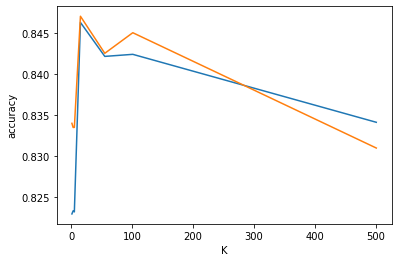

In [388]:
K = [1, 3, 5, 15, 55, 101, 501]
train_acc = []
test_acc = []

for i in K:
################  문제 5-2  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

# 소스코드를 입력하고 그래프와 함께 캡처 후 보고서에 업로드 하세요
  classifier_name = KNeighborsClassifier(n_neighbors = i) #i에 따라 neighbor값을 변화시키면서 classifier 생성
  classifier_name.fit(X_train, y_train) # 생성한 classifier에 train set 지정
  train_acc.append(classifier_name.score(X_train, y_train)) # train set의 정확도 
  test_acc.append(classifier_name.score(X_test, y_test)) # test set 의 정확도

################ 코드 끝  ######################
# x축을 K값, y축을 정확도로하여 K에 대한 train, test의 정확도에 대한 그래프 생성
plt.figure()
plt.plot(K, train_acc, label='train accuracy')
plt.plot(K, test_acc, label='test accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')

# 깃허브에 업로드하기
* colab with github 문서 참고